In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.shape

(200, 5)

In [8]:
df.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


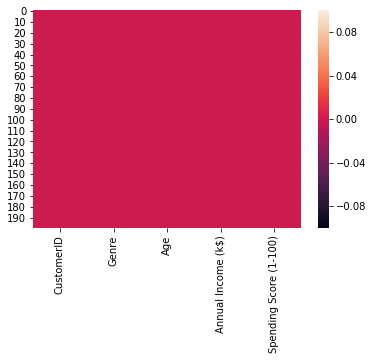

In [9]:
sns.heatmap(df.isnull())

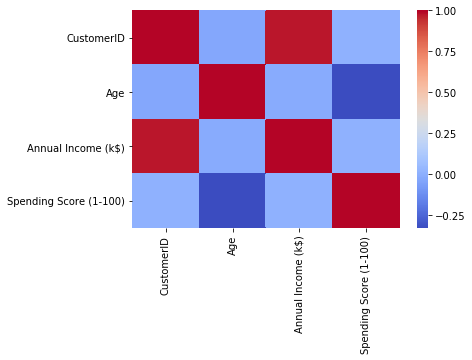

In [11]:
sns.heatmap(df.corr(), cmap="coolwarm")

In [63]:
df.drop(['CustomerID', 'Genre', 'Age'], axis=1, inplace=True)

In [64]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


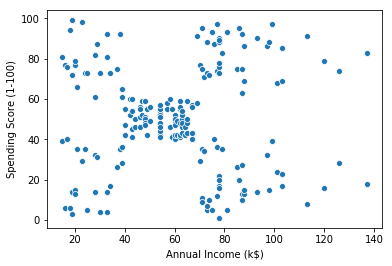

In [17]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])

In [ ]:
# Alternative
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])

In [18]:
# using the matplot lib
# we need np array to plot on matplot lib
df_array = df.values

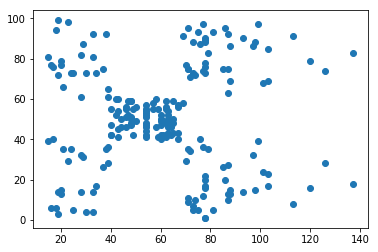

In [22]:
plt.scatter(df_array[:,0], df_array[:,1])

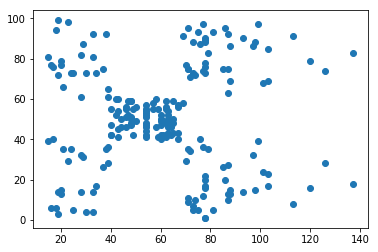

In [23]:
#alternatively
plt.scatter(df.values[:,0], df_array[:,1])

In [25]:
from sklearn.cluster import KMeans

In [26]:
km = KMeans(n_clusters=1)

In [28]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
km.inertia_

269981.28

In [65]:
wcss = []
for i in range(1, 40):
    km = KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)

In [36]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.34361793659,
 25050.83230754752,
 21818.114588452183,
 19657.783608703958,
 17594.047906098695,
 15927.122227150881,
 14528.2031526717,
 13120.300734791525,
 11746.86780105859,
 10776.820209675381,
 10105.259120764293,
 9536.519393348199,
 8683.894391612186,
 7904.2730769230775,
 7575.148410767977,
 7163.273577268143,
 6684.809627329192,
 6263.990550001292,
 6104.864825903371,
 5838.8229122185,
 5397.34110158847,
 5163.2061216561215,
 5080.937012987013,
 4773.740934065934,
 4359.016208791209,
 4205.831204906205,
 4130.656096681097,
 3828.8642773892775,
 3723.2945316121786,
 3477.0199494949497,
 3283.4037157287157,
 3069.247763347764,
 3017.791378066378]

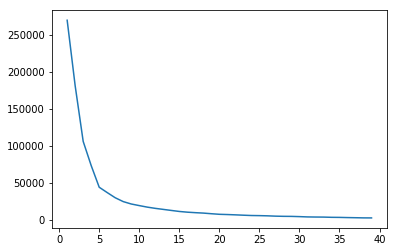

In [38]:
# plot the gaph
plt.plot(range(1, 40), wcss)

In [66]:
km = KMeans(n_clusters=5)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [67]:
km.inertia_

44448.45544793371

In [68]:
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [69]:
# predict the clusters for the rows
clusters = km.predict(df)

In [70]:
clusters

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [71]:
df['cluster'] = clusters

In [72]:
df.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2


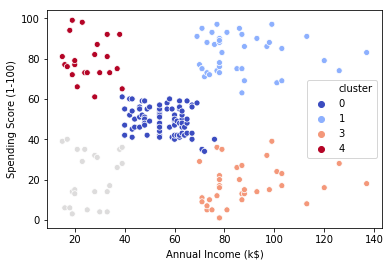

In [73]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='cluster', palette='coolwarm')

In [74]:
d = {4:'LI, HS', 2:'LI,LS', 3:'HI, LS', 0:'MI,MS', 1:'HI,HS'}

In [75]:
df['cluster'] = df['cluster'].map(d)

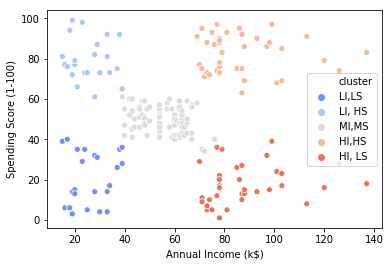

In [76]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='cluster', palette='coolwarm')